In [2]:
from src.positive_TN_src import *

Random rank-one

In [2]:
nlist = [6]
plist = np.linspace(0, 1/4, 21, endpoint=True)
avg_table_psd, _ = avg_entropy_nplist(nlist, plist, bdim=2, repeat=10, mode="all_one")

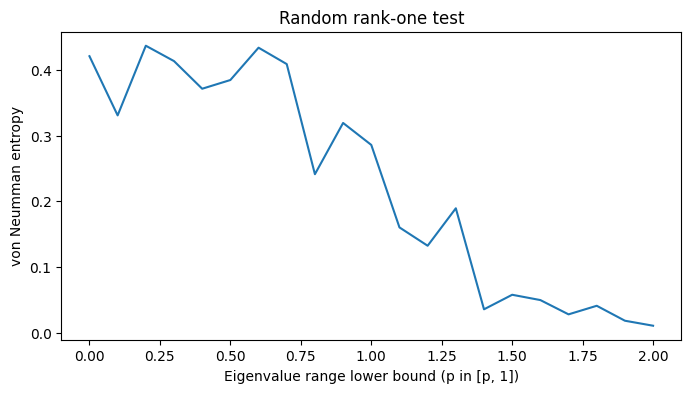

In [3]:
fig = plt.figure(figsize=(8, 4), alpha=0)
fig.patch.set_alpha(1)
plt.plot(plist * 2**3, avg_table_psd[0, :])
plt.title("Random rank-one test")
plt.xlabel("Eigenvalue range lower bound (p in [p, 1])")
plt.ylabel("von Neumman entropy")
#plt.legend(np.round(plist, 2), loc="upper left", ncol=2)
plt.show()

Random PSD, p-test

In [68]:
nlist = [8]
plist = [(i, 1) for i in np.linspace(-1, 1, 21, endpoint=True)]
avg_table_psd, _ = avg_entropy_nplist(nlist, plist, bdim=2, repeat=10, mode=("rand_PSD", 10000))

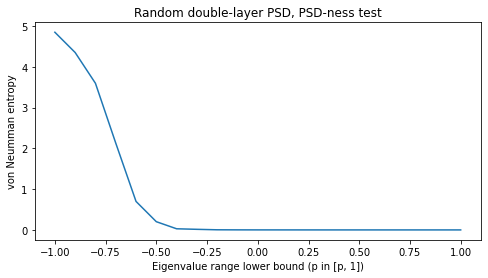

In [90]:
fig = plt.figure(figsize=(8, 4), alpha=0)
fig.patch.set_alpha(1)
plt.plot(np.linspace(-1, 1, 21, endpoint=True), avg_table_psd[0, :])
plt.title("Random double-layer PSD, PSD-ness test")
plt.xlabel("Eigenvalue range lower bound (p in [p, 1])")
plt.ylabel("von Neumman entropy")
#plt.legend(np.round(plist, 2), loc="upper left", ncol=2)
plt.show()

Random PSD, rank-test

In [70]:
nlist = [8]
plist = [(0, 1)]
avg_psd_r_list = []
for r in range(1, 17):
    avg_r, _ = avg_entropy_nplist(nlist, plist, bdim=2, repeat=10, mode=("rand_PSD", r))
    avg_r = avg_r[0, 0]
    avg_psd_r_list.append(avg_r)

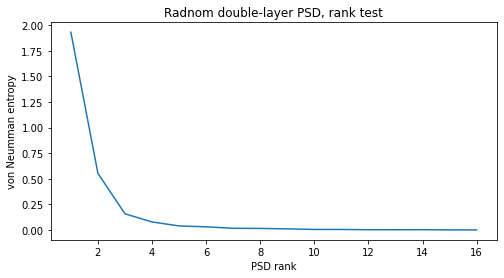

In [91]:
fig = plt.figure(figsize=(8, 4), alpha=0)
fig.patch.set_alpha(1)
plt.plot(range(1, 17), avg_psd_r_list)
plt.title("Radnom double-layer PSD, rank test")
plt.xlabel("PSD rank")
plt.ylabel("von Neumman entropy")
#plt.legend(np.round(plist, 2), loc="upper left", ncol=2)
plt.show()

Random diagonal PSD, p-test

In [60]:
nlist = [8]
plist = [(i, 1) for i in np.linspace(-1, 1, 21, endpoint=True)]
avg_table_dpsd, _ = avg_entropy_nplist(nlist, plist, bdim=2, repeat=10, mode=("rand_PSD_diag", 10000))

Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: 

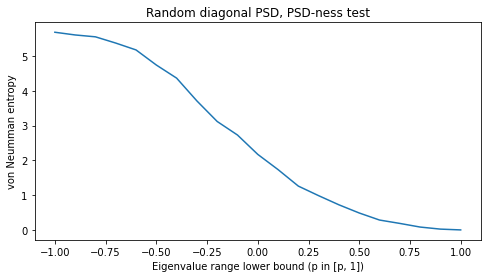

In [92]:
fig = plt.figure(figsize=(8, 4), alpha=0)
fig.patch.set_alpha(1)
plt.plot(np.linspace(-1, 1, 21, endpoint=True), avg_table_dpsd[0, :])
plt.title("Random diagonal PSD, PSD-ness test")
plt.xlabel("Eigenvalue range lower bound (p in [p, 1])")
plt.ylabel("von Neumman entropy")
#plt.legend(np.round(plist, 2), lo 

Random diagonal PSD, rank-test

In [61]:
nlist = [8]
plist = [(0, 1)]
avg_dpsd_r_list = []
for r in range(1, 17):
    avg_r, _ = avg_entropy_nplist(nlist, plist, bdim=2, repeat=10, mode=("rand_PSD_diag", r))
    avg_r = avg_r[0, 0]
    avg_dpsd_r_list.append(avg_r)

Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: Finished: 

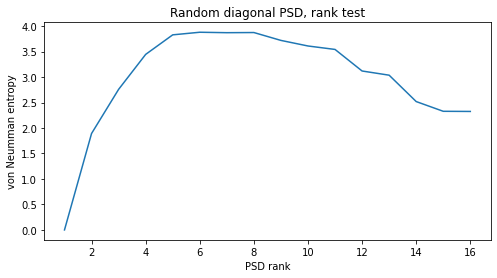

In [93]:
fig = plt.figure(figsize=(8, 4), alpha=0)
fig.patch.set_alpha(1)
plt.plot(range(1, 17), avg_dpsd_r_list)
plt.title("Random diagonal PSD, rank test")
plt.xlabel("PSD rank")
plt.ylabel("von Neumman entropy")
#plt.legend(np.round(plist, 2), loc="upper left", ncol=2)
plt.show()

Random rank-one, type and p-test

In [102]:
nlist = [8] #range(2, 11, 2)
plist = np.linspace(0, 1, 101)
avg_table1, std_table1 = avg_entropy_nplist(nlist, plist, bdim=2, repeat=20, mode="all_one")
avg_table2, std_table2 = avg_entropy_nplist(nlist, plist, bdim=2, repeat=20, mode="rand_rank_one")

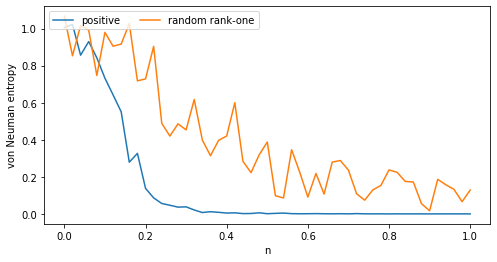

In [101]:
fig = plt.figure(figsize=(8, 4), alpha=0)
fig.patch.set_alpha(1)
plt.plot(plist, avg_table1[0, :])
plt.plot(plist, avg_table2[0, :])
plt.title("")
plt.xlabel("n")
plt.ylabel("von Neuman entropy")
plt.legend(["positive", "random rank-one"], loc="upper left", ncol=2)
plt.show()

# Typical rank of random 4 by 4 matrix

In [584]:
quantities = []

def rand_gen():
    #return np.random.choice([0, 1], size=(2, 2))
    return np.random.normal(0, 1, size=(2, 2))
    #return np.random.random(size=(2, 2))
    #return np.identity(2)

def rand_mat():
    mat00 = rand_gen()
    mat01 = rand_gen()
    mat10 = rand_gen()
    mat11 = rand_gen()
    mat = np.kron(mat00, mat01) + np.kron(mat10, mat11)
    return mat

def rand_mat2():
    #return np.random.uniform(-1.5, -0.5, size=(4, 4))
    #return np.random.normal(0, 100, size=(4, 4))
    return np.random.choice([0, 1], size=(4, 4))

def calc_entropy(mat):
    u, s, vh = np.linalg.svd(mat)
    s2 = s**2
    s2 = s2 / np.sum(s2)
    entropy = -np.sum(s2 * np.log2(s2))
    return entropy

def low_rank_approx(A, r=2):
    u, s, v = np.linalg.svd(A, full_matrices=False)
    Ar = np.zeros((len(u), len(v)))
    for i in range(r):
        Ar += s[i] * np.outer(u.T[i], v[i])
    return Ar

def low_rank_error(A):
    return np.linalg.norm(A - low_rank_approx(A)) / np.linalg.norm(A)

for _ in range(10000):
    mat = rand_mat2()
    quantity = low_rank_error(mat)#calc_entropy(mat)/2
    quantities.append(quantity)

print(mat)
quantities = np.array(quantities)

np.mean(quantities), np.std(quantities)

[[0 0 1 1]
 [1 1 1 1]
 [1 0 1 0]
 [1 0 0 1]]


(0.2597307787647786, 0.11600814109437933)

(array([1008.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   71.,  132.,   98.,  190.,  171.,
         212.,  633.,  252.,  272.,  418.,  284.,  441.,  298.,  417.,
         637.,  592.,  546.,  522.,  135.,  209.,  160.,  278.,  314.,
         205.,  340.,   42.,  256.,  217.,  111.,    0.,   80.,  222.,
          85.,   17.,    0.,    0.,   70.,    0.,    0.,   52.,    0.,
           0.,    0.,    0.,   10.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    3.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.151

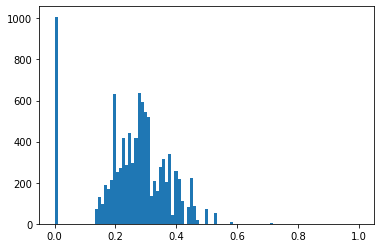

In [585]:
plt.hist(quantities, bins=np.linspace(0, 1, 100))

In [224]:
"""
n = 10
bdim = 2

stn = qtn.TN2D_rand(n, n, bdim, dist="normal", loc=0, scale=1)
ptn = qtn.TN2D_rand(n, n, bdim, dist="normal", loc=1, scale=1)

max_bond = 36

stn_val = stn.contract_boundary(max_bond=None)
stn_val_app = stn.contract_boundary(max_bond=max_bond)
ptn_val = ptn.contract_boundary(max_bond=None)
ptn_val_app = ptn.contract_boundary(max_bond=max_bond)

stn_diff = np.abs(stn_val - stn_val_app) / np.abs(stn_val)
ptn_diff = np.abs(ptn_val - ptn_val_app) / np.abs(ptn_val)

print(f"standard TN: exact={stn_val}, truncated={stn_val_app}, diff={stn_diff}")
print(f"positive TN: exact={ptn_val}, truncated={ptn_val_app}, diff={ptn_diff}")
"""

'\nn = 10\nbdim = 2\n\nstn = qtn.TN2D_rand(n, n, bdim, dist="normal", loc=0, scale=1)\nptn = qtn.TN2D_rand(n, n, bdim, dist="normal", loc=1, scale=1)\n\nmax_bond = 36\n\nstn_val = stn.contract_boundary(max_bond=None)\nstn_val_app = stn.contract_boundary(max_bond=max_bond)\nptn_val = ptn.contract_boundary(max_bond=None)\nptn_val_app = ptn.contract_boundary(max_bond=max_bond)\n\nstn_diff = np.abs(stn_val - stn_val_app) / np.abs(stn_val)\nptn_diff = np.abs(ptn_val - ptn_val_app) / np.abs(ptn_val)\n\nprint(f"standard TN: exact={stn_val}, truncated={stn_val_app}, diff={stn_diff}")\nprint(f"positive TN: exact={ptn_val}, truncated={ptn_val_app}, diff={ptn_diff}")\n'

# Tensor elements distribution

In [431]:
n = 5
bdim = 2

tn = qtn.TN2D_rand(n, n, bdim, dist="normal", loc=4, scale=1)

cur_tensor = None
for i in range(n):
    for j in range(2):
        if cur_tensor == None:
            cur_tensor = tn[i, j]
        else:
            cur_tensor = cur_tensor @ tn[i, j]

array = cur_tensor.data.flatten()
vec = array.flatten()



array([4.10435393e+09, 4.29372971e+09, 3.91632998e+09, 4.16804909e+09,
       3.88568077e+09, 4.07330349e+09, 3.61905259e+09, 3.85797800e+09,
       4.57588442e+09, 4.78675542e+09, 4.36943107e+09, 4.65005952e+09,
       4.35509501e+09, 4.56605577e+09, 4.04865651e+09, 4.31648129e+09,
       5.33988762e+09, 5.58627489e+09, 5.09524147e+09, 5.42273607e+09,
       5.05599009e+09, 5.30011984e+09, 4.70907000e+09, 5.01995556e+09,
       5.77020193e+09, 6.03594214e+09, 5.51197459e+09, 5.86584268e+09,
       5.50896278e+09, 5.77627193e+09, 5.11616854e+09, 5.45497560e+09])

In [779]:
n = 8
bdim = 2
num_rows = n

points = []
for iter in range(100000):
    tn = qtn.TN2D_rand(n, n, bdim, dist="normal", loc=4**n, scale=1)

    cur_tensor = None
    for i in range(n):
        for j in range(num_rows):
            if cur_tensor == None:
                cur_tensor = tn[i, j]
            else:
                cur_tensor = cur_tensor @ tn[i, j]
    if num_rows != n:
        array = cur_tensor.data.flatten()
        #vec = array.flatten()
        points.append([array[0], array[-1]])
    else:
        points.append([cur_tensor])
points = np.array(points)

#print(np.mean(array), np.var(array))

#qtn.MatrixProductState.from_dense(vec, [2]*n, cutoff=1E-10, cutoff_mode="rel").show()
#qtn.MatrixProductState.from_dense(vec, [2]*n).show()
#plt.plot(vec)

if num_rows != n:
    cov = np.mean(points[:, 0] * points[:, 1]) - np.mean(points[:, 0]) * np.mean(points[:, 1])
    print(f"Covariance: {cov}")
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
if num_rows != n:
    axs.hist(points[:, 0], bins = 50)
else:
    axs.hist(points, bins = 50)
 
# Show plot
plt.show()

KeyboardInterrupt: 

In [458]:
model = distfit(bound='both')
model.fit_transform(points)
distfit.plot(
          pdf_properties={'color': 'r', 'linewidth': 4},
          bar_properties={'color': '#1e3f5a', 'edgecolor': 'k'})

[distfit] >ERROR> This release requires matplotlib version >= 3.5.2. Try: pip install -U matplotlib
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.96 sec] [RSS: 1.82657e-245] [loc=2092835066151709673606940048931227655076263704912087579451952598427449026863554646983882762904147686908222800951402456678400.000 scale=1458128388201838936065415952138263872135140212643507321403786541546130624748222065455770004960996646066353103269339433774612480.000]
[distfit] >INFO> [expon     ] [0.63 sec] [RSS: 1.82736e-245] [loc=-191001201438323896071455777966071391236986850015941737459820527868107455268793068906058914501994867871250521879160812023125639168.000 scale=191003294273390032623341987860953940512447969526666807736322848847795897189125590820387324166935551848791132151866457969594990592.000]
[distfit] >INFO> [pareto    ] [2.64 sec] [RSS: 1.82781e-245] [loc=-1910012014383239345499774541325549969782369478124395939830034091820202169370483464897715819797396055804949114

KeyboardInterrupt: 

# Truncation bond dimension needed to match exact

In [900]:
n = 8
bdim = 2
#scale = 1
dist = "uniform"

p = np.linspace(0, 1, 10)
locs = -1 + 2*p
scales = 2 - 2*p
#print(locs)
#print(scales)
max_bonds = move_loc_test(n, locs, scales, bdim=bdim, dist=dist, repeat=20)
print("Done!")

-1.0
--------------------
-0.7777777777777778
--------------------
-0.5555555555555556
--------------------
-0.33333333333333337
--------------------
-0.11111111111111116
--------------------
0.11111111111111116
--------------------
0.33333333333333326
--------------------
0.5555555555555554
--------------------
0.7777777777777777
--------------------
1.0
--------------------
Done!


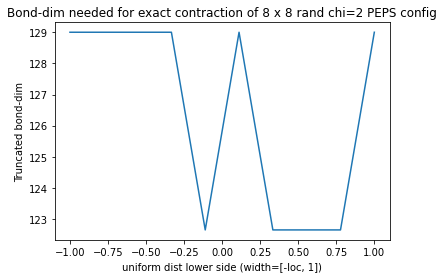

In [902]:
fig = plt.figure()
fig.patch.set_alpha(1)
plt.plot(locs, max_bonds)
plt.title(f"Bond-dim needed for exact contraction of {n} x {n} rand chi={bdim} PEPS config")
if dist == "uniform":
    plt.xlabel(f"uniform dist lower side (width=[-loc, 1])")
if dist == "normal":
    plt.xlabel(f"Gaussian dist mean (variance=1-mean)")
plt.ylabel("Truncated bond-dim")
plt.show()

# Single tensor factorization bound

In [771]:
# recursive function of c = mu/sigma at each level
def c_rec(k, n, c):
    if k == n:
        return c
    else:
        c_up = c_rec(k+1, n, c)
        return (1 + 6*c_up**2 + c_up**4)/(4 * (c_up + c_up**3))

# total error for single tensor factorization of all levels
def e_total(n, c, chi=1):
    s = 0
    for k in range(1, n+1):
        denom = chi * np.sqrt((c_rec(k, n, c) - 1)**2 + 3/2*c)
        s += (1 + 1/denom)**(k**2) - 1
    return s

n = 13
chi = 1
def c(n): return n**10

e_total(n, c(n), chi) - e_total(n-1, c(n-1), chi) 

5.242877178179839e-06